In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
subm = h5py.File("./outputs_final/tiers357max_mean(final).hdf5", mode="r")
repr = h5py.File("./outputs/tiers357max_mean(final).hdf5", mode="r")

tolerance = 0.01

In [3]:
sorted(subm.keys()) == sorted(repr.keys())

True

In [6]:
def check_proximity(key):

    subm_array = np.array(subm[key]["intensity"])
    repr_array = np.array(repr[key]["intensity"])

    check = np.allclose(subm_array, repr_array, atol=tolerance)

    return check

In [7]:
check_repr = [check_proximity(i) for i in list(subm.keys())]

In [8]:
print(f"{sum(check_repr)} timestamps out of {len(list(subm.keys()))} are reproducible with tolerance of {tolerance}")

1147 timestamps out of 1152 are reproducible with tolerance of 0.01


In [12]:
failed_ts = np.array(sorted(subm.keys()))[~np.array(check_repr)].tolist()

In [13]:
failed_ts

['1648115400', '1648116000', '1648116600', '1654932000', '1656490200']

In [18]:
def check_stats(key, return_arrays=False):

    subm_array = np.array(subm[key]["intensity"])
    repr_array = np.array(repr[key]["intensity"])

    print(f"Max subm: {subm_array.max()}, max repr: {repr_array.max()}")
    print(f"Mean subm: {subm_array.mean()}, mean repr: {repr_array.mean()}")
    print(f"Max abs diff: {np.max(np.abs(repr_array-subm_array))}")

    if return_arrays:
        return subm_array, repr_array

In [19]:
for i in failed_ts:
    print(i)
    check_stats(i)
    print("\n")

1648115400
Max subm: 2.505859375, max repr: 2.505859375
Mean subm: 0.11358642578125, mean repr: 0.1136474609375
Max abs diff: 0.04083251953125


1648116000
Max subm: 2.365234375, max repr: 2.365234375
Mean subm: 0.11383056640625, mean repr: 0.1138916015625
Max abs diff: 0.02099609375


1648116600
Max subm: 2.26171875, max repr: 2.26171875
Mean subm: 0.1138916015625, mean repr: 0.1138916015625
Max abs diff: 0.017333984375


1654932000
Max subm: 36.375, max repr: 36.375
Mean subm: 0.1923828125, mean repr: 0.1923828125
Max abs diff: 0.015625


1656490200
Max subm: 25.328125, max repr: 25.328125
Mean subm: 0.1494140625, mean repr: 0.1494140625
Max abs diff: 0.015625




In [21]:
s, r = check_stats("1648115400", return_arrays=True)

Max subm: 2.505859375, max repr: 2.505859375
Mean subm: 0.11358642578125, mean repr: 0.1136474609375
Max abs diff: 0.04083251953125


(0, 0)


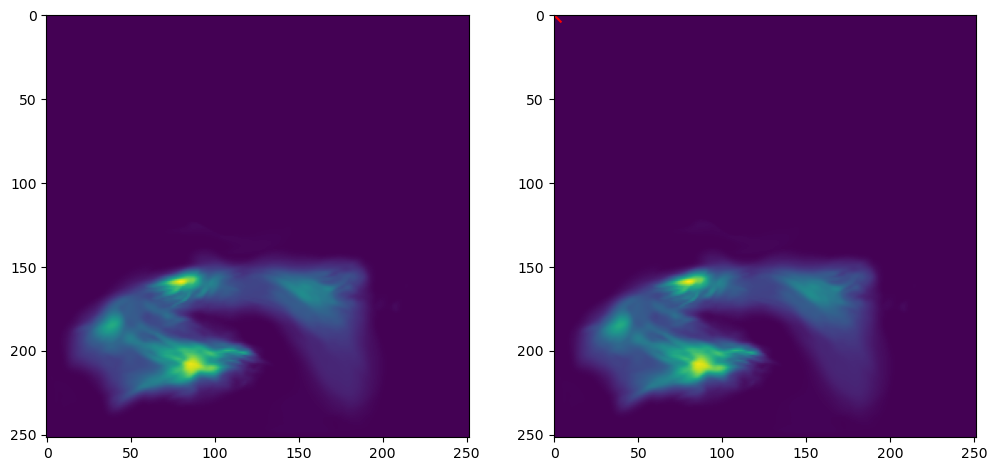

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

max_index = np.unravel_index(np.argmax(np.max(np.abs(r-s)), axis=None), s.shape)

print(max_index)

axes[0].imshow(s)
axes[1].imshow(r)

axes[1].scatter(max_index[1], max_index[0], color='red', marker='x', s=100)

In [26]:
for i in failed_ts:
    s, r = check_stats(i, return_arrays=True)

    max_index = np.unravel_index(np.argmax(np.max(np.abs(r-s)), axis=None), s.shape)

    print(f"The point with maximum difference is: {max_index}")

    print("\n")

Max subm: 2.505859375, max repr: 2.505859375
Mean subm: 0.11358642578125, mean repr: 0.1136474609375
Max abs diff: 0.04083251953125
The point with maximum difference is: (0, 0)


Max subm: 2.365234375, max repr: 2.365234375
Mean subm: 0.11383056640625, mean repr: 0.1138916015625
Max abs diff: 0.02099609375
The point with maximum difference is: (0, 0)


Max subm: 2.26171875, max repr: 2.26171875
Mean subm: 0.1138916015625, mean repr: 0.1138916015625
Max abs diff: 0.017333984375
The point with maximum difference is: (0, 0)


Max subm: 36.375, max repr: 36.375
Mean subm: 0.1923828125, mean repr: 0.1923828125
Max abs diff: 0.015625
The point with maximum difference is: (0, 0)


Max subm: 25.328125, max repr: 25.328125
Mean subm: 0.1494140625, mean repr: 0.1494140625
Max abs diff: 0.015625
The point with maximum difference is: (0, 0)




In [7]:
subm.close()
repr.close()